## Part 3 Decision Tree

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score
import scipy

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

folder_dir = './cifar-10-batches-py/' 

Mounted at /content/gdrive


load cifar data

In [5]:

import numpy as np
folder_dir = './cifar-10-batches-py/' 
metadata_dict = unpickle(folder_dir+"batches.meta")
label_names = np.array([label.decode('ascii') for label in metadata_dict[b'label_names']])

cifar_train_data = None
cifar_train_filenames = []
cifar_train_labels = []

for i in range(1,6):
    cifar_train_data_dict = unpickle(folder_dir + "data_batch_" + str(i))
    if i == 1:
        cifar_train_data = cifar_train_data_dict[b'data']
    else:
        cifar_train_data = np.vstack((cifar_train_data, cifar_train_data_dict[b'data']))
    cifar_train_labels += cifar_train_data_dict[b'labels']

cifar_train_data = cifar_train_data.reshape((len(cifar_train_data), 3, 32, 32))
cifar_train_data = np.rollaxis(cifar_train_data, 1, 4) # only if plt.imshow()

cifar_test_data_dict = unpickle(folder_dir + "test_batch")
cifar_test_data = cifar_test_data_dict[b'data']
cifar_test_filenames = cifar_test_data_dict[b'filenames']
cifar_test_labels = cifar_test_data_dict[b'labels']

cifar_test_data = cifar_test_data.reshape((len(cifar_test_data), 3, 32, 32))
# cifar_test_data = np.rollaxis(cifar_test_dsata, 1, 4)


cifar_train_data = cifar_train_data.reshape(50000, -1)
cifar_test_data = cifar_test_data.reshape(10000, -1)
print(cifar_train_data.shape)
print(cifar_test_data.shape)

(50000, 3072)
(10000, 3072)


rescaling from [0,255] to [-1,1]

In [7]:
X_train = cifar_train_data/127.5-1
X_test = cifar_test_data/127.5-1
y_train = np.array(cifar_train_labels)
y_test = np.array(cifar_test_labels)
print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)
print("y_train.shape", y_train.shape)

X_train.shape (50000, 3072)
X_test.shape (10000, 3072)
y_test.shape (10000,)
y_train.shape (50000,)


Instantiate the Decision Tree model

In [8]:
tree = sklearn.tree.DecisionTreeClassifier()

Train the DecisionTree model

In [9]:
param_distribution = {'max_depth': range(10,55), 'min_samples_split': range(1,50)}

best_tree1 = sklearn.model_selection.RandomizedSearchCV(tree, param_distribution, n_iter=70, cv=2, random_state=0, verbose=3).fit(X_train, y_train)
    
print('best Hyperparameters = ' + str(best_tree.best_params_))
print(best_tree)
print(best_tree.score(X_test, y_test))


Fitting 2 folds for each of 70 candidates, totalling 140 fits
[CV 1/2] END max_depth=45, min_samples_split=33;, score=0.272 total time= 1.5min
[CV 2/2] END max_depth=45, min_samples_split=33;, score=0.272 total time= 1.5min
[CV 1/2] END .max_depth=14, min_samples_split=5;, score=0.263 total time= 1.4min
[CV 2/2] END .max_depth=14, min_samples_split=5;, score=0.271 total time= 1.4min
[CV 1/2] END max_depth=16, min_samples_split=40;, score=0.276 total time= 1.3min
[CV 2/2] END max_depth=16, min_samples_split=40;, score=0.277 total time= 1.3min
[CV 1/2] END max_depth=51, min_samples_split=34;, score=0.271 total time= 1.5min
[CV 2/2] END max_depth=51, min_samples_split=34;, score=0.272 total time= 1.5min
[CV 1/2] END max_depth=14, min_samples_split=11;, score=0.266 total time= 1.4min
[CV 2/2] END max_depth=14, min_samples_split=11;, score=0.271 total time= 1.4min
[CV 1/2] END max_depth=45, min_samples_split=44;, score=0.272 total time= 1.4min
[CV 2/2] END max_depth=45, min_samples_split=44

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a float in

NameError: ignored

Testing the DecisionTree model

In [14]:
print(best_tree1.score(X_test, y_test))
score = best_tree1.score(X_test, y_test)

0.1329


Plotting the DecisionTree

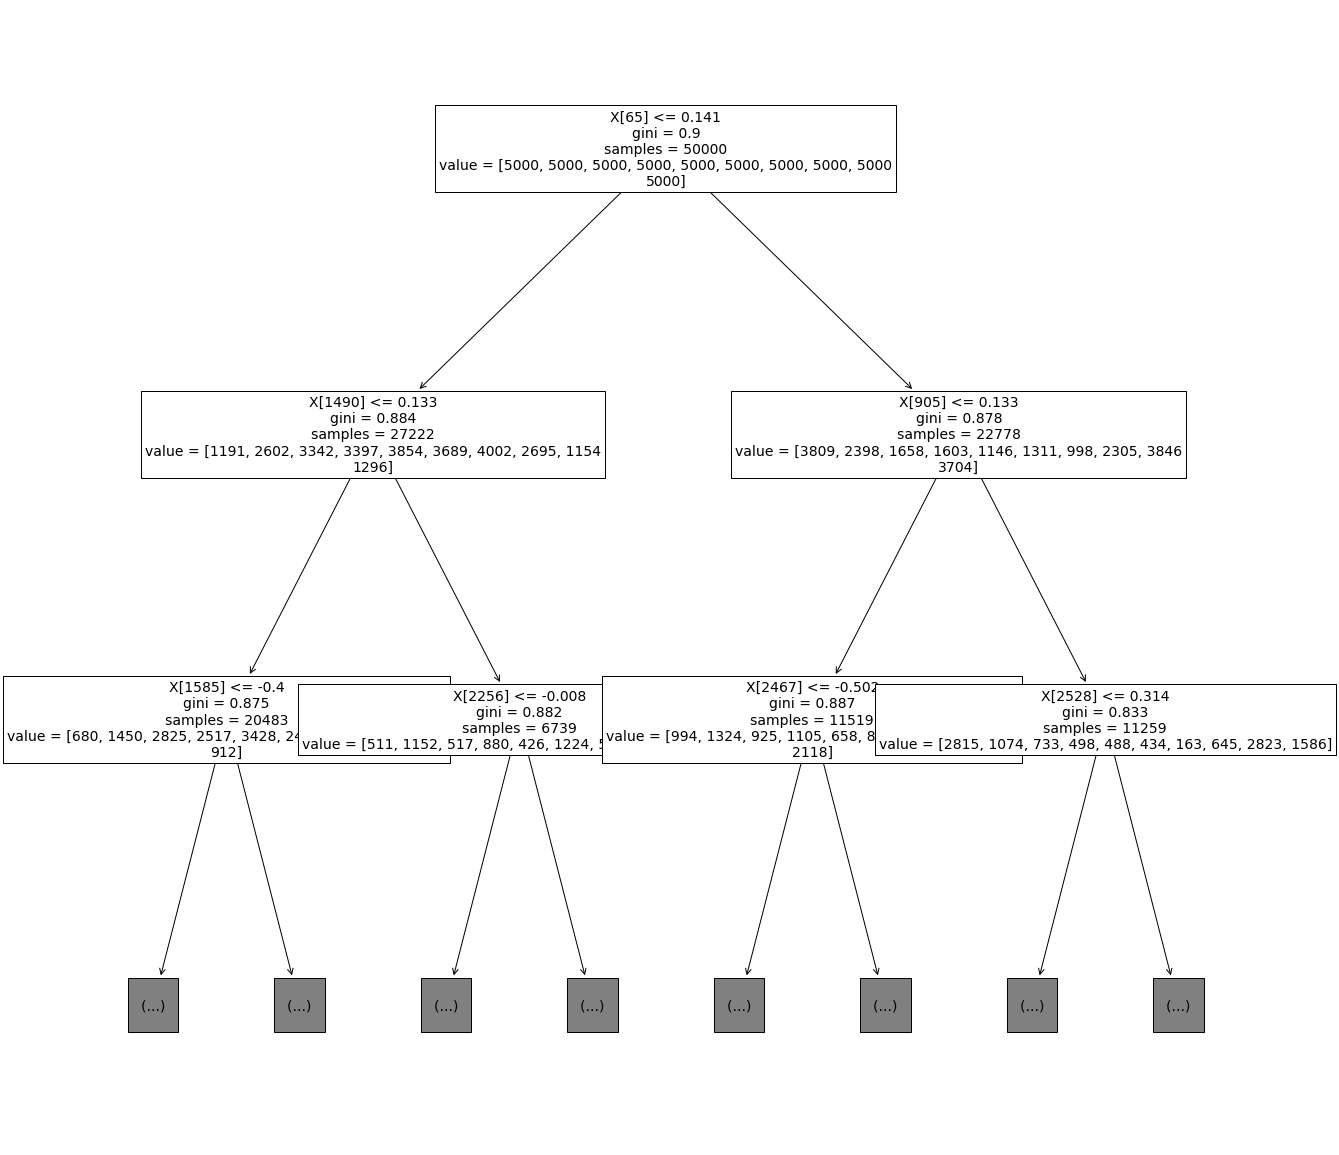

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(21,21))
plot_tree(best_tree1.best_estimator_, max_depth = 2, fontsize=14);